In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# df = pd.read_csv('/content/drive/My Drive/winemag-data_first150k.csv')
df = pd.read_csv('winemag-data_first150k.csv')

In [3]:
pd.set_option('display.max_columns', None)
print(df.shape)
df.head(5)

(150930, 11)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
df_US = df.loc[df['country'] == 'US']

In [5]:
print(df_US.shape)
df_US.head()

(62397, 11)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [6]:
drop_columns = ['Unnamed: 0', 'country']
wine_reviews = df_US.drop(columns = drop_columns)
wine_reviews = wine_reviews.dropna()
wine_reviews = wine_reviews.reset_index(drop = True)
print(wine_reviews.shape)
wine_reviews.head()

(39241, 9)


,description,designation,points,price,province,region_1,region_2,variety,winery
0,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
2,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
3,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
4,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [8]:
pip install category_encoders

     |████████████████████████████████| 102kB 2.6MB/s 


In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression, LogisticRegressionCV
from sklearn.compose import make_column_selector
from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression

from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, RepeatedStratifiedKFold, ShuffleSplit,RepeatedKFold
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_extraction.text import CountVectorizer


In [8]:
drop_columns = ['description', 'region_1', 'points']
X = wine_reviews.drop(columns = drop_columns, axis=1)
y = wine_reviews[['points']]

# 1.1

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

categorical_features = [ 'designation','region_2','province', 'variety']
continuous_features = ['price']
te_features = ['winery']


preprocess = make_column_transformer(
        (TargetEncoder(handle_missing='value',handle_unknown='value'), te_features),
        (OneHotEncoder(handle_unknown='ignore'), categorical_features),
        (StandardScaler(), continuous_features))

model = make_pipeline(preprocess, LinearRegression())

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.5307362685993053


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

categorical_features = ['designation', 'region_2','province', 'variety','winery']
continuous_features = ['price']
te_features = ['winery']


preprocess = make_column_transformer(
        # (TargetEncoder(handle_missing='value',handle_unknown='value'), te_features),
        (OneHotEncoder(handle_unknown='ignore'), categorical_features),
        (StandardScaler(), continuous_features))

model = make_pipeline(preprocess, Ridge())

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.5622236556373285



# 1.2

In [9]:
text_trainval = list(wine_reviews['description'])
y_trainval = wine_reviews[['points']]

In [10]:
text_trainval = [doc.replace("<br />", " ")
                  for doc in text_trainval]

text_train, text_val, y_train, y_val = train_test_split(
    text_trainval, y_trainval, stratify=y_trainval, random_state=0)

vect = CountVectorizer()
X_train = vect.fit_transform(text_train)
X_val = vect.transform(text_val)
X_train

<29430x14561 sparse matrix of type '<class 'numpy.int64'>'
	with 1047313 stored elements in Compressed Sparse Row format>

In [11]:
feature_names = vect.get_feature_names()
print(feature_names[:10])

['00', '000', '008', '01', '01s', '02', '02s', '03', '03s', '04']


In [12]:
print(feature_names[::2000])

['00', 'burgundian', 'disturbs', 'half', 'meditative', 'prospects', 'spotlight', 'violety']


# LogisticRegressionCV

In [0]:
lr = LogisticRegressionCV().fit(X_train, y_train)
lr.score(X_val, y_val)

0.5943328916522271

# Ridge

In [0]:
ridge = Ridge().fit(X_train, y_train)
ridge.score(X_val, y_val)

0.7788354173240756

# 1.3

# Parameter -  ngram_range = (1,2)

In [0]:
text_trainval = [doc.replace("<br />", " ")
                  for doc in text_trainval]

text_train, text_val, y_train, y_val = train_test_split(
    text_trainval, y_trainval, stratify=y_trainval, random_state=0)

vect = CountVectorizer(ngram_range=(1, 2))
X_train = vect.fit_transform(text_train)
X_val = vect.transform(text_val)
X_train

<29430x214249 sparse matrix of type '<class 'numpy.int64'>'
	with 2213879 stored elements in Compressed Sparse Row format>

In [0]:
rid_pipe = make_pipeline(Ridge())

param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1., 10., 100.]}

grid = GridSearchCV(rid_pipe, param_grid=param_grid,cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_val, y_val))

{'ridge__alpha': 10.0}
0.8523216142607601


# Parameter -   ngram_range = (1,3)

In [13]:
text_trainval = [doc.replace("<br />", " ")
                  for doc in text_trainval]

text_train, text_val, y_train, y_val = train_test_split(
    text_trainval, y_trainval, stratify=y_trainval, random_state=0)

vect = CountVectorizer(ngram_range=(1, 3))
X_train = vect.fit_transform(text_train)
X_val = vect.transform(text_val)
X_train

<29430x709645 sparse matrix of type '<class 'numpy.int64'>'
	with 3354680 stored elements in Compressed Sparse Row format>

In [14]:
rid_pipe = make_pipeline(Ridge())

param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1., 10., 100.]}

grid = GridSearchCV(rid_pipe, param_grid=param_grid,cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_val, y_val))

{'ridge__alpha': 10.0}
0.8632828092584381


In [15]:
ridge = Ridge(alpha=10.).fit(X_train, y_train)
ridge.score(X_val, y_val)

0.8632828092584381

ngram_range = (1,3) seems to be good for our data. 

In [21]:

sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

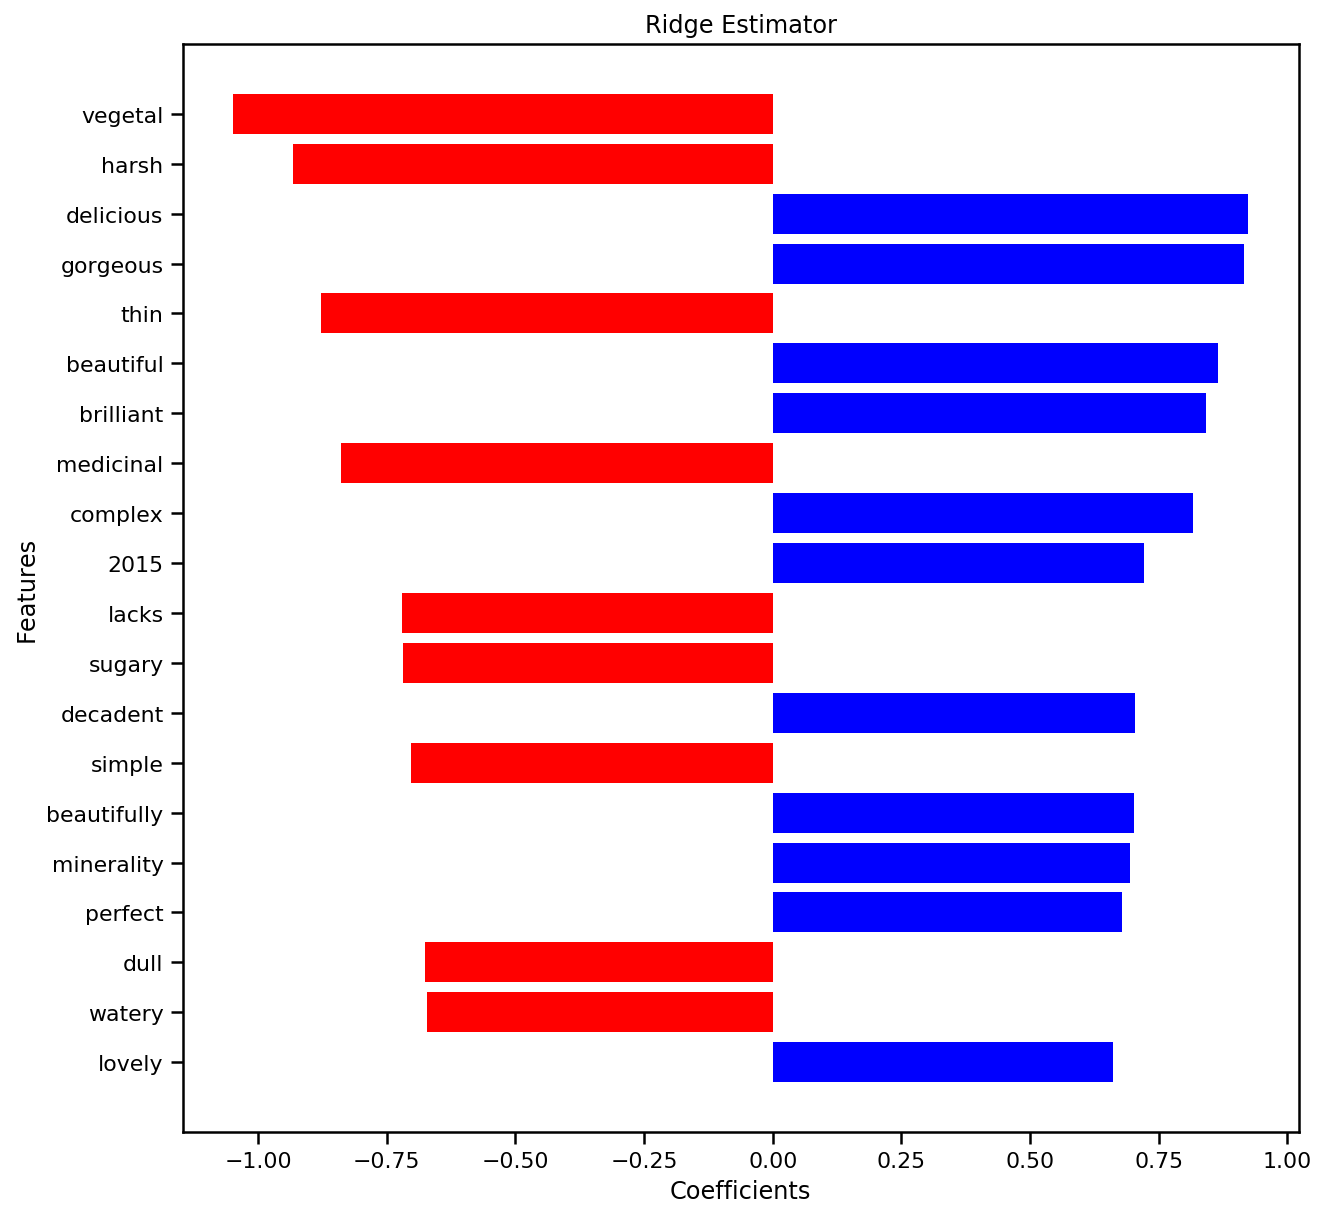

In [22]:
%matplotlib inline
coef = ridge.coef_.ravel()
coef_abs =  [abs(ele) for ele in coef]
indices = np.argsort(coef_abs)
indices_20imp = indices[-20:]
top_coef = coef[indices_20imp]
features = np.array(vect.get_feature_names())
top_features = features[indices_20imp]

colors = ['b' if ele==1.0 else 'r' for ele in np.sign(top_coef)]

fig, ax2 = plt.subplots(1,1, figsize=(10, 10))
ax2.barh(top_features,top_coef,color=colors)
ax2.set_xlabel('Coefficients')
ax2.set_ylabel('Features')
ax2.set_title('Ridge Estimator')
plt.show()

In [17]:
pd.set_option('display.max_colwidth', -1)

**The overall points range is from 80 to 100**

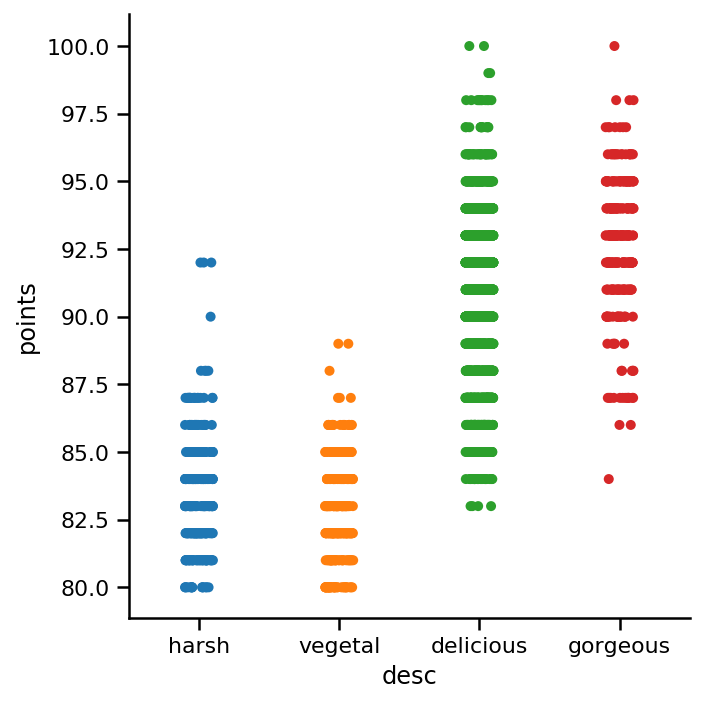

In [23]:
%matplotlib inline
import seaborn as sns
harsh_desc = wine_reviews[wine_reviews['description'].str.contains("harsh")]
harsh_desc = harsh_desc.assign(desc = 'harsh')
vegetal_desc = wine_reviews[wine_reviews['description'].str.contains("vegetal")]
vegetal_desc = vegetal_desc.assign(desc = 'vegetal')
delicious_desc = wine_reviews[wine_reviews['description'].str.contains("delicious")]
delicious_desc = delicious_desc.assign(desc = 'delicious')
gorgeous_desc = wine_reviews[wine_reviews['description'].str.contains("gorgeous")]
gorgeous_desc = gorgeous_desc.assign(desc = 'gorgeous')

desc = harsh_desc.append(vegetal_desc)
desc = desc.append(delicious_desc)
desc = desc.append(gorgeous_desc)
desc = desc[['desc','points']]

sns.catplot(x = "desc", y = "points", data = desc)

plt.show()


# Parameter -  stop_words

Tried the English stopwords, but it didn't improve the accuracy much. So created my own stop words set, with words that didn't add much value towards the prediction.

In [0]:
from collections import Counter
common_words_df = pd.DataFrame(Counter(" ".join(wine_reviews["description"]).split()).most_common(100), columns=['words','count'])

stop = set(common_words_df['words'])
mystopwords = {'A','It',"It's",'The','This','a','all','an','and','are','as','at','be','but','by','for','from','has',
               'in','into','is','it',"it's",'its','just','like','more','new','not','notes','now','now,','now.','of',
               'on','or','over','should','shows','so','some','than','that','the','this','through','to','which',
               'will','wine','wine,','wine.','with','you'}

In [0]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stopwords = set(ENGLISH_STOP_WORDS)
for word in mystopwords:
  stopwords.add(word)


In [0]:
text_trainval = [doc.replace("<br />", " ")
                  for doc in text_trainval]

text_train, text_val, y_train, y_val = train_test_split(
    text_trainval, y_trainval, stratify=y_trainval, random_state=0)

vect = CountVectorizer(ngram_range=(1, 3),stop_words=mystopwords)
X_train = vect.fit_transform(text_train)
X_val = vect.transform(text_val)
X_train

<29430x691438 sparse matrix of type '<class 'numpy.int64'>'
	with 2202094 stored elements in Compressed Sparse Row format>

In [0]:
rid_pipe = make_pipeline(Ridge())

param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1., 10., 100., 1000.]}

grid = GridSearchCV(rid_pipe, param_grid=param_grid,cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_val, y_val))

{'ridge__alpha': 1.0}
0.86660074413953


In [0]:
ridge = Ridge(alpha=1.).fit(X_train, y_train)
ridge.score(X_val, y_val)

0.86660074413953

# Parameter - min_df = 2

In [0]:
text_trainval = [doc.replace("<br />", " ")
                  for doc in text_trainval]

text_train, text_val, y_train, y_val = train_test_split(
    text_trainval, y_trainval, stratify=y_trainval, random_state=0)

vect = CountVectorizer(ngram_range=(1, 3),min_df =2)
X_train = vect.fit_transform(text_train)
X_val = vect.transform(text_val)
X_train

<29430x330062 sparse matrix of type '<class 'numpy.int64'>'
	with 2975097 stored elements in Compressed Sparse Row format>

In [0]:
rid_pipe = make_pipeline(Ridge())

param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1., 10., 100.]}

grid = GridSearchCV(rid_pipe, param_grid=param_grid,cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_val, y_val))

{'ridge__alpha': 10.0}
0.856799258179701


In [0]:
ridge = Ridge(alpha=10.).fit(X_train, y_train)
ridge.score(X_val, y_val)

0.856799258179701

# Using Tf-idf rescaling


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
text_trainval = [doc.replace("<br />", " ")
                  for doc in text_trainval]

text_train, text_val, y_train, y_val = train_test_split(
    text_trainval, y_trainval, stratify=y_trainval, random_state=0)

vect_tfidf = make_pipeline(CountVectorizer(ngram_range = (1,2)),TfidfTransformer())

X_train = vect_tfidf.fit_transform(text_train)
X_val = vect_tfidf.transform(text_val)

In [0]:
ridge = Ridge(alpha= .1).fit(X_train, y_train)
ridge.score(X_val, y_val)

0.8552212949598105

# 1.3 - Combining Text and Non-Text Features

In [0]:
text_traintest = list(wine_reviews['description'])
y_traintest = wine_reviews[['points']]

In [0]:
text_traintest = [doc.replace("<br />", " ")
                  for doc in text_traintest]

text_train, text_test, y_train_text, y_test_text = train_test_split(
    text_traintest, y_traintest, stratify=y_traintest, random_state=0)

vect = CountVectorizer(ngram_range=(1, 3), stop_words=mystopwords)
X_train_text = vect.fit_transform(text_train)
X_test_text = vect.transform(text_test)
X_train_text

<29430x691438 sparse matrix of type '<class 'numpy.int64'>'
	with 2202094 stored elements in Compressed Sparse Row format>

In [0]:
drop_columns = ['description', 'region_1', 'points']
X = wine_reviews.drop(columns = drop_columns, axis=1)
y = wine_reviews[['points']]

In [0]:
X_train, X_test, y_train_nontext, y_test_nontext = train_test_split(X,y,stratify=y, random_state=0)

categorical_features = ['region_2', 'province','variety']
continuous_features = ['price']
te_features = ['designation', 'winery']


preprocess = make_column_transformer(
        (TargetEncoder(handle_missing='value',handle_unknown='value'), te_features),
        (OneHotEncoder(handle_unknown='ignore'), categorical_features),
        (StandardScaler(), continuous_features))

model = make_pipeline(preprocess)

X_train_nontext = model.fit_transform(X_train, y_train_nontext)

X_test_nontext = model.transform(X_test)

X_train_nontext

<29430x197 sparse matrix of type '<class 'numpy.float64'>'
	with 176580 stored elements in Compressed Sparse Row format>

In [0]:
from scipy.sparse import hstack
X_train_combined = hstack([X_train_text, X_train_nontext])
X_test_combined = hstack([X_test_text, X_test_nontext])

X_train_combined

<29430x691635 sparse matrix of type '<class 'numpy.float64'>'
	with 2378674 stored elements in COOrdinate format>

In [0]:
ridge = Ridge(alpha= .1).fit(X_train_combined, y_train_text)
ridge.score(X_test_combined, y_test_text)

0.8877886622360549